### Project 2 - Random Maze

5×6 Matrix{Bool}:
 1  0  1  1  1  0
 0  1  0  0  1  1
 0  0  0  0  1  0
 0  1  0  1  0  0
 0  0  1  0  1  0

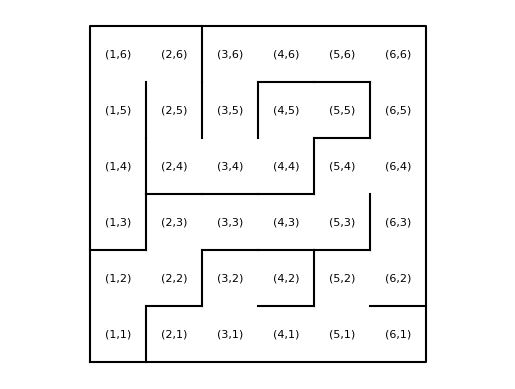

In [47]:
H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];
using PyPlot, Random
Random.seed!(123)
function plot_maze(H,V)
    clf()
    axis("off")
    axis("equal")
    n = size(H,1)
    plot([0,n,n,0,0], [0,0,n,n,0], color="k")
    
    for x = 1:n-1, y = 1:n
        if V[x,y]
            plot([x,x], [y-1,y], color="k")
        end
    end
    for x = 1:n, y = 1:n-1
        if H[x,y]
            plot([x-1,x], [y,y], color="k")
        end
    end
end

function plot_cell_indices(n)
    for i = 1:n
        for j = 1:n
            text(i-0.5, j-0.5, "($i,$j)",
                horizontalalignment="center",
                verticalalignment="center",
                fontsize=8)
        end
    end
end
plot_maze(H,V)
plot_cell_indices(size(H,1))
display(V)

#=
x = [6, 5, 5, 6, 6, 6, 6, 6, 5, 4, 3, 3, 3, 2, 2, 2, 1];
y = [1, 1, 2, 2, 3, 4, 5, 6, 6, 6, 6, 5, 4, 4, 5, 6, 6];
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);
=#

#### Problem 1 - Generate random maze

In [185]:
#Random.seed!(123)
function make_maze(n)
    H = trues(n,n-1)
    V = trues(n-1,n)
    visit = falses(n,n)

    function dig(x,y)
        visit[x,y] = true
        directions = [[1, 0], [-1, 0], [0, 1], [0, -1]]
        shuffle!(directions)
        for d in directions
            x1 = x + d[1]
            y1 = y + d[2]
            if (1 <= x1 <= n)&&(1 <= y1 <= n)&&(!visit[x1,y1])
                if d[1] == 1 #down
                    println("now at (",x,",",y,")",", go down to (",x1,",",y1,")")
                    V[x,y] = false
                    dig(x1,y1)
                elseif d[1] == -1 #up
                    println("now at (",x,",",y,")",", go up to (",x1,",",y1,")")
                    V[x1,y1] = false
                    dig(x1,y1)
                elseif d[2] == 1 #right
                    println("now at (",x,",",y,")",", go right to (",x1,",",y1,")")
                    H[x,y] = false
                    dig(x1,y1)
                elseif d[2] == -1#left
                    println("now at (",x,",",y,")",", go left to (",x1,",",y1,")")
                    H[x1,y1] = false
                    dig(x1,y1)
                end
            end
        end

    end
    dig(1,1)
    return H,V,visit
end
H,V,m = make_maze(64)
display(m)

now at (1,1), go down to (2,1)
now at (2,1), go down to (3,1)
now at (3,1), go down to (4,1)
now at (4,1), go right to (4,2)
now at (4,2), go right to (4,3)
now at (4,3), go up to (3,3)
now at (3,3), go up to (2,3)
now at (2,3), go up to (1,3)
now at (1,3), go right to (1,4)
now at (1,4), go down to (2,4)
now at (2,4), go down to (3,4)
now at (3,4), go right to (3,5)
now at (3,5), go down to (4,5)
now at (4,5), go right to (4,6)
now at (4,6), go down to (5,6)
now at (5,6), go right to (5,7)
now at (5,7), go right to (5,8)
now at (5,8), go right to (5,9)
now at (5,9), go up to (4,9)
now at (4,9), go right to (4,10)
now at (4,10), go right to (4,11)
now at (4,11), go up to (3,11)
now at (3,11), go right to (3,12)
now at (3,12), go right to (3,13)
now at (3,13), go up to (2,13)
now at (2,13), go up to (1,13)
now at (1,13), go left to (1,12)
now at (1,12), go left to (1,11)
now at (1,11), go left to (1,10)
now at (1,10), go down to (2,10)
now at (2,10), go left to (2,9)
now at (2,9), go up

64×64 BitMatrix:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1  1  1  1  1  1  1  1  1  1  1
 1  1  1  1  1  1  1  1  1  1  1  1  1     1  1

#### Problem 2- Find path from (1,n) to (n,1)

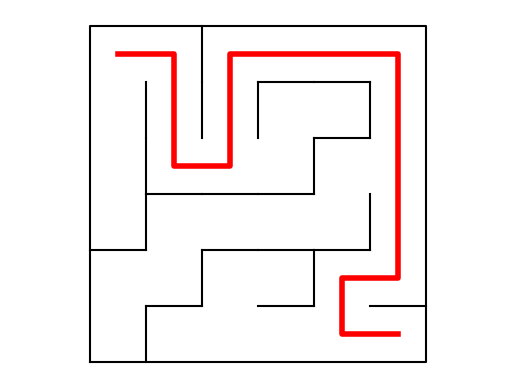

In [45]:
Random.seed!(123)
function find_path(H,V)
    n = size(H,1)
    visit = falses(n,n)
    pathx = []
    pathy = []
    directions = [[1, 0], [-1, 0], [0, 1], [0, -1]] #down, up, right, left
    function recur(x,y)
        visit[x,y] = true
        if (x == n)&&(y == 1)
            visit[x,y] = true
            append!(pathx,x)
            append!(pathy,y)
            return true
        end
        for d in directions
            x1 = x + d[1]
            y1 = y + d[2]
            #println("try go to (",x1,",",y1,")","the direction is ", d)
            if (1 <= x1 <= n)&&(1 <= y1 <= n)&&(!visit[x1,y1])
                if (d[1] == 1)&&(V[x,y]) #down
                    #println("cannot go down")
                    continue
                elseif (d[1] == -1)&&(V[x1,y1]) #up
                    #println("cannot go up")
                    continue
                elseif (d[2] == 1)&&(H[x,y]) #right
                    #println("cannot go right")
                    continue
                elseif (d[2] == -1)&&(H[x1,y1]) #left
                    #println("cannot go left")
                    continue
                end
                if recur(x1,y1)
                    #println("go to (",x,",",y,")")
                    append!(pathx,x)
                    append!(pathy,y)
                    return true
                end
            end
        end
        return false
    end
    recur(1,n)
    return pathx,pathy
end

H = Bool[0 1 0 0 0; 1 0 1 0 0; 0 1 1 0 0; 1 1 1 0 1; 0 1 0 1 1; 1 0 0 0 0];
V = Bool[1 0 1 1 1 0; 0 1 0 0 1 1; 0 0 0 0 1 0; 0 1 0 1 0 0; 0 0 1 0 1 0];
x,y = find_path(H,V)
plot_maze(H,V);
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);

now at (1,1), go down to (2,1)
now at (2,1), go right to (2,2)
now at (2,2), go down to (3,2)
now at (3,2), go down to (4,2)
now at (4,2), go right to (4,3)
now at (4,3), go down to (5,3)
now at (5,3), go right to (5,4)
now at (5,4), go down to (6,4)
now at (6,4), go left to (6,3)
now at (6,3), go left to (6,2)
now at (6,2), go up to (5,2)
now at (5,2), go left to (5,1)
now at (5,1), go up to (4,1)
now at (4,1), go up to (3,1)
now at (5,1), go down to (6,1)
now at (6,1), go down to (7,1)
now at (7,1), go right to (7,2)
now at (7,2), go down to (8,2)
now at (8,2), go left to (8,1)
now at (8,1), go down to (9,1)
now at (9,1), go right to (9,2)
now at (9,2), go down to (10,2)
now at (10,2), go right to (10,3)
now at (10,3), go right to (10,4)
now at (10,4), go right to (10,5)
now at (10,5), go right to (10,6)
now at (10,6), go up to (9,6)
now at (9,6), go left to (9,5)
now at (9,5), go left to (9,4)
now at (9,4), go up to (8,4)
now at (8,4), go right to (8,5)
now at (8,5), go right to (8,

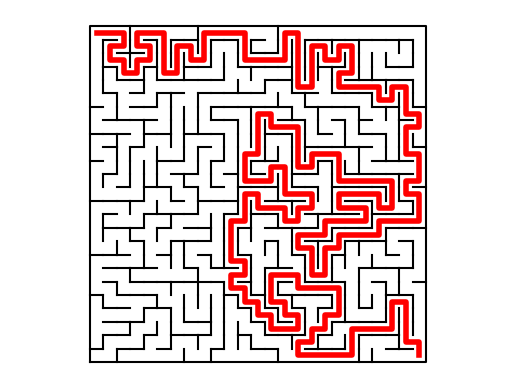

In [118]:
Random.seed!(123)
n = 25
H,V = make_maze(n)
plot_maze(H,V)
x, y = find_path(H,V)
plot(x .- 0.5, y .- 0.5, color="r", linewidth=4);